In [3]:
# -------------------------------
#  Data Analyst Task
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt



In [4]:
# 1. Access processed data
df = pd.read_csv("processed_sales_data.csv")

In [5]:
# 2. Analyse: top 5 products by revenue
top_products = (
    df.groupby('product_id')['total_revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

In [6]:
# Merge to get average sentiment
avg_sentiment = (
    df.groupby('product_id')['sentiment_score']
    .mean()
    .reset_index()
    .rename(columns={'sentiment_score': 'avg_sentiment'})
)

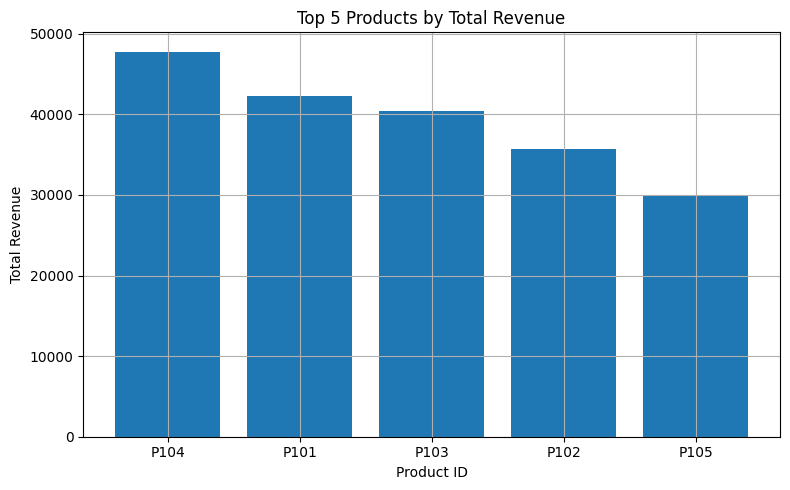

In [7]:
# Merge for final report
report_df = pd.merge(top_products, avg_sentiment, on='product_id', how='left')

# 3. Communicate: Display chart
# 3. Communicate: Display separate charts

# Plot 1: Bar chart for Total Revenue
plt.figure(figsize=(8, 5))
plt.bar(report_df['product_id'], report_df['total_revenue'])
plt.title('Top 5 Products by Total Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

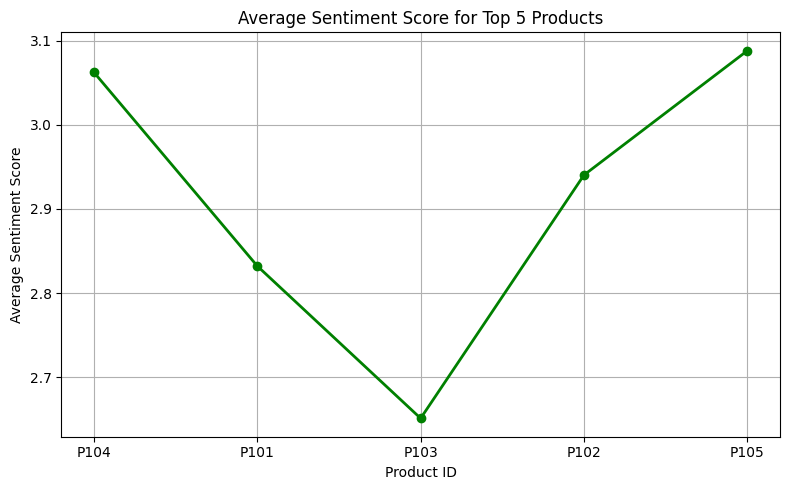

In [8]:
# Plot 2: Line plot for Average Sentiment Score
plt.figure(figsize=(8, 5))
plt.plot(report_df['product_id'], report_df['avg_sentiment'], color='green', marker='o', linewidth=2)
plt.title('Average Sentiment Score for Top 5 Products')
plt.xlabel('Product ID')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# 4. Feedback
print("\n--- Feedback to Data Engineer ---")
if df['sentiment_score'].isnull().sum() > 0:
    print("Some sentiment scores are missing. Consider collecting more feedback data.")
if df['sale_date'].isnull().sum() > 0:
    print("Some sale_date entries couldn't be parsed. Please ensure date consistency.")

print("\n--- Final Report ---")
print(report_df)


--- Feedback to Data Engineer ---

--- Final Report ---
  product_id  total_revenue  avg_sentiment
0       P104        47797.5       3.062411
1       P101        42313.5       2.832203
2       P103        40464.0       2.651181
3       P102        35674.5       2.940367
4       P105        29949.0       3.088119
